In [1]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os

Todos: 

- Do reviews go up on protest days? 
- Regress on meta?
- Percentage of extreme reviews.

In [2]:
#get yellow 
path = r"C:\Users\tlebr\OneDrive - pku.edu.cn\China in Transition\openrice\data\reviews\yellow_eat/"
def getdf(path):
    ls = []
    for root, dirs, files in os.walk(path):
        for name in files:
            if name.endswith(".csv"):
    #             print(fr"{root}/{name}")
                ls.append(pd.read_csv(fr"{root}/{name}"))
    df = pd.concat(ls)
    return df

yellowdf = getdf(path)
path = r"C:\Users\tlebr\OneDrive - pku.edu.cn\China in Transition\openrice\data\reviews\blue_eat/"
bluedf = getdf(path)

#     print("root", root)
#     print("dirs", dirs)
#     print("files", files)


In [3]:
yellowdf["color"] = "Yellow"
bluedf["color"] = "Blue"

In [4]:
masterdf = pd.concat([yellowdf, bluedf])

In [169]:
masterdf

,url,id,total_reviews,final_url,a_plus,username,grade,user_link,review_link,title,...,spending_per_head,recommended_dishes,waiting_time,type_of_meal,taste,decor,service,hygiene,value,color
0,https://www.openrice.com/en/hongkong/r-coffee-...,4650,218,https://www.openrice.com/en/hongkong/r-coffee-...,0,chubbyyan,Level4,/en/restaurant/userinfo.htm?userid=65727435,/en/hongkong/review/%E5%A5%BD%E9%A3%9Fbagel%E9...,好食bagel靚拉花,...,NaN,NaN,NaN,NaN,5.0,4.0,4.0,5.0,4.0,Yellow
1,https://www.openrice.com/en/hongkong/r-coffee-...,4650,55,https://www.openrice.com/en/hongkong/r-coffee-...,0,SharonTsang9575,Level3,/en/restaurant/userinfo.htm?userid=64090135,/en/hongkong/review/%E9%AB%98%E8%B3%AAcafe-e40...,高質cafe☕🤎,...,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4.0,Yellow
2,https://www.openrice.com/en/hongkong/r-coffee-...,4650,683,https://www.openrice.com/en/hongkong/r-coffee-...,0,F. Teresa,Level4,/en/restaurant/userinfo.htm?userid=58525495,/en/hongkong/review/%E9%AB%98%E8%A1%97%E5%93%8...,高街品啡,...,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4.0,Yellow
3,https://www.openrice.com/en/hongkong/r-coffee-...,4650,340,https://www.openrice.com/en/hongkong/r-coffee-...,0,iristsang,Level4,/en/restaurant/userinfo.htm?userid=167494,/en/hongkong/review/%E5%87%BA%E7%A5%9E%E5%85%A...,出神入化的咖啡拉花,...,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4.0,Yellow
4,https://www.openrice.com/en/hongkong/r-coffee-...,4650,276,https://www.openrice.com/en/hongkong/r-coffee-...,0,cherry tabo,Level4,/en/restaurant/userinfo.htm?userid=465866,/en/hongkong/review/%E5%88%9D%E5%9A%90%E5%92%8...,初嚐咁清新解渴的咖啡,...,NaN,NaN,NaN,NaN,5.0,3.0,3.0,3.0,3.0,Yellow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25420,https://www.openrice.com/en/hongkong/r-market-...,2178,1,https://www.openrice.com/en/hongkong/r-market-...,0,dannythegreathk,Level1,/en/restaurant/userinfo.htm?userid=50046877,/en/hongkong/review/%E6%9C%89%E6%83%B3%E6%B3%9...,"有想法,但食物質素有待改善",...,$270 (Last Night Supper),"魚卜,蝦,蔬菜",NaN,NaN,3.0,4.0,2.0,3.0,3.0,Blue
25421,https://www.openrice.com/en/hongkong/r-market-...,2178,249,https://www.openrice.com/en/hongkong/r-market-...,0,回味無窮,Level4,/en/restaurant/userinfo.htm?userid=64693,/en/hongkong/review/%E7%89%B9%E5%BC%8F%E7%9A%8...,特式的街市火鍋,...,$292 (Dinner),NaN,NaN,NaN,3.0,4.0,3.0,3.0,3.0,Blue
25422,https://www.openrice.com/en/hongkong/r-market-...,2178,1,https://www.openrice.com/en/hongkong/r-market-...,0,lilytam,Level1,/en/restaurant/userinfo.htm?userid=50010526,/en/hongkong/review/%E7%81%AB%E9%8D%8B%E5%BA%9...,火鍋店街市檔打邊爐，即買即食，新鮮又好味,...,$200,"生劏海班,游水海班,象拔蚌，東風螺,跳跳螺,牛舌,鮑魚仔,田雞,鮑魚,花膠雞湯,東風螺,元貝,海班",NaN,NaN,5.0,5.0,5.0,5.0,5.0,Blue
25423,https://www.openrice.com/en/hongkong/r-market-...,2178,1,https://www.openrice.com/en/hongkong/r-market-...,0,scottdust2207,Level1,/en/restaurant/userinfo.htm?userid=50009976,/en/hongkong/review/%E7%89%B9%E8%89%B2%E7%81%A...,特色火鍋,...,$350 (Dinner),一班朋友,NaN,NaN,4.0,4.0,3.0,3.0,3.0,Blue


In [5]:
len(bluedf), len(yellowdf), len(yellowdf)+ len(bluedf)

(181904, 219612, 401516)

In [6]:

# bluepath = r"C:\Users\tlebr\OneDrive - pku.edu.cn\China in Transition\openrice\scrap\blue_rev\blue_eat_id749-2255_start_500-2256.csv"
# yellowpath = r"C:\Users\tlebr\OneDrive - pku.edu.cn\China in Transition\openrice\scrap\yellow_rev\yellow_eat_id5222-7085_start_500-7086.csv"
# bluedf = pd.read_csv(bluepath, encoding="utf-8")
# yellowdf = pd.read_csv(yellowpath, encoding="utf-8")

### Cleaning

In [7]:
scrapedate = datetime(2021, 7, 5)

In [8]:
mapping = {
    "6 day(s) ago" : scrapedate - timedelta(6),
    "5 day(s) ago" : scrapedate - timedelta(5),
    "4 day(s) ago" : scrapedate - timedelta(4),
    "3 day(s) ago" : scrapedate - timedelta(3),
    "2 day(s) ago" : scrapedate - timedelta(2),
    "1 day(s) ago" : scrapedate - timedelta(1), 
}
def transformations(df):
    df.columns = map(str.lower, df.columns)
    df[df.date.str.contains("day")].date.unique()
    df.date = pd.to_datetime(df.date.replace(mapping))
    df["aggregate_rating"] = df.taste + df.decor + df.service + df.hygiene + df.value
    df["mean_rating"] = df.aggregate_rating  / 5
    
#     aggregate rating is sum of 5 cols with max 25, min 5
    # could also be july 2019
    proteststart =  datetime(2019, 6, 12)
    covidstart =  datetime(2020, 1, 25)
    df["during_protest"] =  (df.date > proteststart) & (df.date < covidstart)
    df["during_covid"] =  (df.date > covidstart)
    df["pre_covid"] =  (df.date < proteststart)
    return df

    

In [9]:
bdf = transformations(bluedf)
ydf = transformations(yellowdf)
masterdf = transformations(masterdf)

In [10]:
def groupbymonth(df):
    return df.groupby(pd.Grouper(key='date', freq='1M')).count() 
    

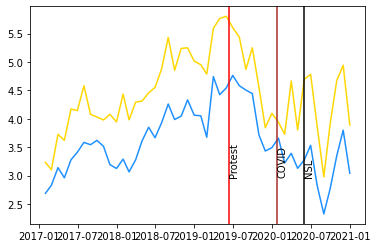

In [11]:
bluemonths = bdf.groupby(pd.Grouper(key='date', freq='1M'))
groupedb = pd.DataFrame()
groupedb["total_reviews"] = bluemonths.id.count()
groupedb["number_of_restaurants"] = bluemonths.id.nunique()
groupedb["Blue Restaurants"] = groupedb["total_reviews"] / groupedb["number_of_restaurants"] 
plt.plot(groupedb[(groupedb.index.year > 2016) & (groupedb.index.year < 2021)]["Blue Restaurants"], c="dodgerblue")
# .plot(kind="line", c="dodgerblue", legend=True)


yellowmonths = ydf.groupby(pd.Grouper(key='date', freq='1M'))
groupedy = pd.DataFrame()
groupedy["total_reviews"] = yellowmonths.id.count()
groupedy["number_of_restaurants"] = yellowmonths.id.nunique()
groupedy["Yellow Restaurants"] = groupedy["total_reviews"] / groupedy["number_of_restaurants"] 
plt.plot(groupedy[(groupedy.index.year > 2016) & (groupedy.index.year < 2021)]["Yellow Restaurants"], c="gold")
#          .plot(kind="line", 
#                                                                                               title="Reviews per month", c="gold", legend=True);

plt.axvline(datetime(2019, 6, 12), color="red")
plt.text(datetime(2019, 6, 12),3,'Protest',rotation=90)
plt.axvline(datetime(2020, 1, 25), color="brown")
plt.text(datetime(2020, 1, 25),3,'COVID',rotation=90)

# plt.text(datetime(2019, 6, 12),0,'balh"',rotation=90)

plt.axvline(datetime(2020, 6, 1), color="black")
plt.text(datetime(2020, 6, 1), 3,'NSL', rotation=90)
# plt.title("Average rating for ")
# plt.legend()
plt.show()
# plt.subplot(1, 2,2)
# # blue_extreme = groupbymonth(bdf[bdf[ratingcols].eq(1).all(1) | bdf[ratingcols].eq(5).all(1)])
# # blue_extreme.url.iloc[-36:].plot(kind="line")
# plt.axvline(datetime(2019, 6, 12), color="red")
# plt.axvline(datetime(2020, 1, 25), color="black")
# plt.title("blue")
# bluemonths.url.plot(kind="line")
# yellowmonths = yellowdf.groupby(pd.Grouper(key='date', freq='1M')).count() 
# yellowmonths.url.plot(kind="line")


# bluemonths[bluemonths.index.month == 8].tail(5)
# bluemonths[(bluemonths.index.year > 2016) & (bluemonths.index.year < 2021)].url.plot(kind="line", c="dodgerblue", legend=True)

# yellowmonths[(yellowmonths.index.year > 2016) & (yellowmonths.index.year < 2021)].url.plot(kind="line", c="gold", legend=True)

<AxesSubplot:xlabel='date'>

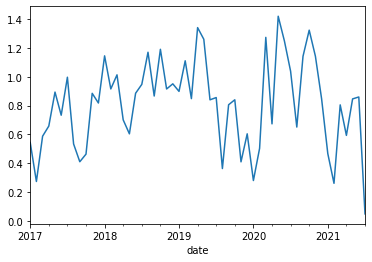

In [12]:
numrev_diff = (groupedy["Yellow Restaurants"] - groupedb["Blue Restaurants"])
numrev_diff[numrev_diff.index.year > 2016].plot()

### filter by restaurants who were open before Jan 2017



In [13]:
# Get the mean values of the ratings, and filter 
# for restaurants whose first review is before 2019 and has a review in 2020 or later. 
def mean_group(df1):
    grouped = df1.groupby("id")
    df = pd.DataFrame()
    df["total_reviews"] = grouped.url.count()

    df["mean_service"] = grouped["service"].mean()
    df["hygiene"] = grouped["hygiene"].mean()
    df["value"] = grouped["value"].mean()
    df["decor"] = grouped["decor"].mean()
    df["taste"] = grouped["taste"].mean()
    df["first_review"] = grouped.date.min()
    df["last_review"] = grouped.date.max()
    df = df[(df.first_review.dt.year <= 2017) & (df.last_review.dt.year >= 2020)]
    return df


In [14]:
bluemonths1

NameError: name 'bluemonths1' is not defined

In [16]:
dfb = mean_group(bdf)
blue17_21 = pd.merge(bdf, dfb, on="id", how="inner").set_index("id")
bluemonths1 = blue17_21.groupby(pd.Grouper(key='date', freq='1M')).count() 
# bluemonths[(bluemonths.index.year > 2016) & (bluemonths.index.year < 2021)].url.plot(kind="line")
b = ((bluemonths1 - bluemonths1.shift(12)) /
     bluemonths1)[(bluemonths1.index.year > 2017) &
                 (bluemonths1.index.year <= 2021)]
#                   b.url.plot(kind="line", title="Year to year change")
dfy = mean_group(ydf)
yellow17_21 = pd.merge(ydf, dfy, on="id", how="inner")
yellowmonths1 = yellow17_21.groupby(pd.Grouper(key='date', freq='1M')).count() 
# bluemonths[(bluemonths.index.year > 2016) & (bluemonths.index.year < 2021)].url.plot(kind="line")
y = ((yellowmonths1 - yellowmonths1.shift(12)) /
     yellowmonths1)[(yellowmonths1.index.year > 2017) &
                 (yellowmonths1.index.year <= 2021)]
#                   y.url.plot(kind="line", title="Year to year change")

''

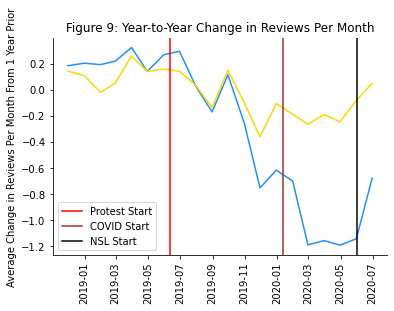

In [18]:
fig, ax = plt.subplots()

ax.plot(b.url.iloc[10:-13], c="dodgerblue")
# title="Year-to-year change in number of reviews")
ax.plot(y.url.iloc[10:-13], c="gold")
ax.tick_params(axis='x', rotation=90)

# ax.xticks(rotation=90)
ax.axvline(datetime(2019, 6, 12), color="red", label="Protest Start")
# plt.text(datetime(2019, 6, 30),0.0245,'Protest',rotation=90)
ax.axvline(datetime(2020, 1, 12), color="brown", label="COVID Start")
# plt.text(datetime(2020, 1, 31), 0.025,'COVID',rotation=90)

# plt.text(datetime(2019, 6, 12),0,'balh"',rotation=90)

ax.axvline(datetime(2020, 6, 1), color="black", label="NSL Start")
# plt.text(datetime(2020, 6, 30), .027,'NSL', rotation=90)
ax.legend()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.set_title("Figure 9: Year-to-Year Change in Reviews Per Month")
ax.set_ylabel('Average Change in Reviews Per Month From 1 Year Prior')
fig.savefig("y2yrevchange.png", bbox_inches="tight")
;
# plt.show();

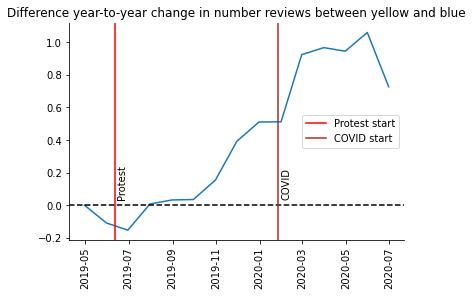

In [20]:
# ax = plt.axes()
# .
fig, ax = plt.subplots()
ax.plot((y.url-b.url).iloc[15:-13])
# ax.spines['left'].set_position('zero')

# # turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.axhline(0, c="black", linestyle="dashed")
# # set the y-spine
# ax.spines['bottom'].set_position('zero')

# # turn off the top spine/ticks
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()
ax.set_title("Difference year-to-year change in number reviews between yellow and blue")
ax.axvline(datetime(2019, 6, 12), color="red", label="Protest start")
ax.text(datetime(2019, 6, 15),.05,'Protest',rotation=90)
ax.axvline(datetime(2020, 1, 27), color="brown", label="COVID start")
ax.text(datetime(2020, 1, 31), .05,'COVID',rotation=90)
ax.tick_params(axis='x', rotation=90)
ax.legend()
# plt.text(datetime(2019, 6, 12),0,'balh"',rotation=90)

# ax.axvline(datetime(2020, 6, 1), color="black")
# ax.text(datetime(2020, 6, 30), .027,'NSL', rotation=90)
plt.show();
#          , title="Difference year-to-year change in reviews between yellow and blue");

In [21]:
dfb = mean_group(bdf)
blue17_21 = pd.merge(bdf, dfb, on="id", how="inner").set_index("id")
bluemonths1 = blue17_21.groupby(pd.Grouper(key='date', freq='1M')).count() 
# bluemonths[(bluemonths.index.year > 2016) & (bluemonths.index.year < 2021)].url.plot(kind="line")
b = ((bluemonths1 - bluemonths1.shift(24)) /
     bluemonths1)[(bluemonths1.index.year > 2017) &
                 (bluemonths1.index.year <= 2021)]
#                   b.url.plot(kind="line", title="Year to year change")
dfy = mean_group(ydf)
yellow17_21 = pd.merge(ydf, dfy, on="id", how="inner")
yellowmonths1 = yellow17_21.groupby(pd.Grouper(key='date', freq='1M')).count() 
# bluemonths[(bluemonths.index.year > 2016) & (bluemonths.index.year < 2021)].url.plot(kind="line")
y = ((yellowmonths1 - yellowmonths1.shift(24)) /
     yellowmonths1)[(yellowmonths1.index.year > 2017) &
                 (yellowmonths1.index.year <= 2021)]

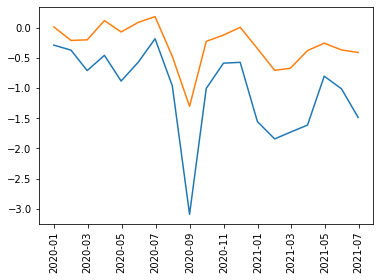

In [22]:
plt.plot(b.url.iloc[-20:-1])
# title="Year-to-year change in number of reviews")
plt.plot(y.url.iloc[-20:-1])

plt.xticks(rotation=90)
plt.show();

## Extreme

In [23]:

# grouped = yellowdf.groupby("id")
# df = pd.DataFrame()
# df["total_reviews"] = grouped.url.count()

# df["Mean_service"] = grouped["Service"].mean()
# df["Hygiene"] = grouped["Hygiene"].mean()
# df["Value"] = grouped["Value"].mean()
# df["Decor"] = grouped["Decor"].mean()
# df["Taste"] = grouped["Taste"].mean()



# df["first_review"] = grouped.date.min()
# df["last_review"] = grouped.date.max()

# df = df[(df.first_review.dt.year <= 2018) & (df.last_review.dt.year >= 2020)]
# yellow17_21 = pd.merge(yellowdf, df, on="id", how="inner")
# yellowmonths = yellow17_21.groupby(pd.Grouper(key='date', freq='1M')).count() 
# yellowmonths[(yellowmonths.index.year > 2016) & (yellowmonths.index.year < 2021)].url.plot(kind="line")
# ((yellowmonths - yellowmonths.shift(12)) / yellowmonths)[(yellowmonths.index.year > 2018) & (yellowmonths.index.year <= 2021)].url

In [24]:
ratingcols = ["taste", "decor", "service", "hygiene", "value", "mean_rating"]
bdf.columns

Index(['url', 'id', 'total_reviews', 'final_url', 'a_plus', 'username',
       'grade', 'user_link', 'review_link', 'title', 'emoji', 'date',
       'viewcount', 'body', 'dining_method', 'date_of_visit',
       'spending_per_head', 'recommended_dishes', 'waiting_time',
       'type_of_meal', 'taste', 'decor', 'service', 'hygiene', 'value',
       'color', 'aggregate_rating', 'mean_rating', 'during_protest',
       'during_covid', 'pre_covid'],
      dtype='object')

In [25]:
yellow_good = groupbymonth(ydf[ydf[ratingcols].eq(5).all(1)])
blue_good = groupbymonth(bdf[bdf[ratingcols].eq(5).all(1)])

In [26]:
yellow_bad = groupbymonth(ydf[ydf[ratingcols].eq(1).all(1)])
blue_bad = groupbymonth(bdf[bdf[ratingcols].eq(1).all(1)])


In [27]:
# yellow_bad

In [28]:
# blue_bad

<AxesSubplot:xlabel='date'>

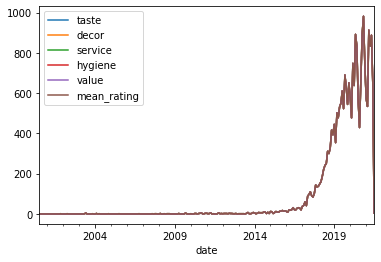

In [29]:
yellow_good[ratingcols].plot()

Text(0.5, 1.0, 'blue')

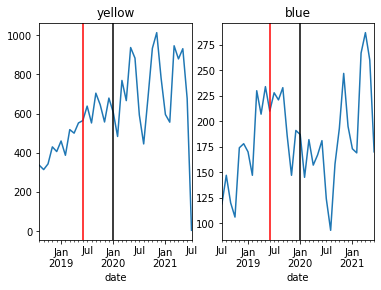

In [30]:
# plt.subplot(1, 2,1)
# plt.plot(blue_bad.index, blue_bad.url)
# plt.subplot(1, 2,2)
# plt.plot(yellow_bad.index, yellow_bad.url)



plt.subplot(1, 2,1)
yellow_extreme = groupbymonth(ydf[ydf[ratingcols].eq(1).all(1) | ydf[ratingcols].eq(5).all(1)])
yellow_extreme.url.iloc[-36:].plot(kind="line")
plt.title("yellow")
#     proteststart =  datetime
#     covidstart =  datetime
plt.axvline(datetime(2019, 6, 12), color="red")
plt.axvline(datetime(2020, 1, 25), color="black")
plt.subplot(1, 2,2)
blue_extreme = groupbymonth(bdf[bdf[ratingcols].eq(1).all(1) | bdf[ratingcols].eq(5).all(1)])
blue_extreme.url.iloc[-36:].plot(kind="line")
plt.axvline(datetime(2019, 6, 12), color="red")
plt.axvline(datetime(2020, 1, 25), color="black")
plt.title("blue")

In [31]:
proteststart =  datetime(2019, 6, 12)
covidstart =  datetime(2020, 1, 25)
yellow_extreme["during_protest"] =  (yellow_extreme.index > proteststart) & (yellow_extreme.index < covidstart)
yellow_extreme["during_covid"] =  (yellow_extreme.index > covidstart)
yellow_extreme["pre_covid"] =  (yellow_extreme.index < proteststart)
#     return df

In [32]:
yellow_extreme[yellow_extreme.during_protest]

,url,id,total_reviews,final_url,a_plus,username,grade,user_link,review_link,title,...,decor,service,hygiene,value,color,aggregate_rating,mean_rating,during_protest,during_covid,pre_covid
date,,,,,,,,,,,,,,,,,,,,,
2019-06-30,564,564,564,564,564,564,564,564,564,564,...,564,564,564,564,564,564,564,True,False,False
2019-07-31,638,638,638,638,638,638,638,638,638,638,...,638,638,638,638,638,638,638,True,False,False
2019-08-31,552,552,552,552,552,552,552,552,552,552,...,552,552,552,552,552,552,552,True,False,False
2019-09-30,704,704,704,704,704,704,704,704,704,704,...,704,704,704,704,704,704,704,True,False,False
2019-10-31,645,645,645,645,645,645,645,645,645,645,...,645,645,645,645,645,645,645,True,False,False
2019-11-30,557,557,557,557,557,557,557,557,557,557,...,557,557,557,557,557,557,557,True,False,False
2019-12-31,679,679,679,679,679,679,679,679,679,679,...,679,679,679,679,679,679,679,True,False,False


In [33]:
yellowmonths

In [34]:
yellow_good

,url,id,total_reviews,final_url,a_plus,username,grade,user_link,review_link,title,...,decor,service,hygiene,value,color,aggregate_rating,mean_rating,during_protest,during_covid,pre_covid
date,,,,,,,,,,,,,,,,,,,,,
2000-07-31,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2000-08-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000-09-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000-10-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000-11-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-31,913,913,913,913,913,913,913,913,913,913,...,913,913,913,913,913,913,913,913,913,913
2021-04-30,833,833,833,833,833,833,833,833,833,833,...,833,833,833,833,833,833,833,833,833,833
2021-05-31,888,888,888,888,888,888,888,888,888,888,...,888,888,888,888,888,888,888,888,888,888


In [35]:
yellowmonths1

,url,id,total_reviews_x,final_url,a_plus,username,grade,user_link,review_link,title,...,during_covid,pre_covid,total_reviews_y,mean_service,hygiene_y,value_y,decor_y,taste_y,first_review,last_review
date,,,,,,,,,,,,,,,,,,,,,
1999-11-30,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1999-12-31,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
2000-01-31,2,2,2,2,2,2,2,1,2,2,...,2,2,2,2,2,2,2,2,2,2
2000-02-29,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2000-03-31,1,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-31,1683,1683,1683,1683,1683,1683,1683,1683,1683,1683,...,1683,1683,1683,1683,1683,1683,1683,1683,1683,1683
2021-04-30,1642,1642,1642,1642,1642,1642,1642,1642,1642,1642,...,1642,1642,1642,1642,1642,1642,1642,1642,1642,1642
2021-05-31,1679,1679,1679,1679,1679,1679,1679,1679,1679,1679,...,1679,1679,1679,1679,1679,1679,1679,1679,1679,1679


In [36]:
monthjoin = yellowmonths1[["url"]].merge(yellow_good[["url"]], how="left", left_index=True, right_index=True)
monthjoin = monthjoin.merge(yellow_bad[["url"]], how="left", left_index=True, right_index=True)
monthjoin.columns = ["full_yellow", "extreme_high_yellow", "extreme_low_yellow"]
monthjoin["extreme_both_y"] = monthjoin["extreme_low_yellow"] + monthjoin["extreme_high_yellow"]
monthjoin["extreme_both_y_percent"] = monthjoin["extreme_both_y"]*100 / monthjoin["full_yellow"]
monthjoin["extreme_low_y_percent"] = monthjoin["extreme_low_yellow"] *100/ monthjoin["full_yellow"]
monthjoin["extreme_high_y_percent"] = monthjoin["extreme_high_yellow"]*100 / monthjoin["full_yellow"]

In [37]:
monthjoin = monthjoin.merge(bluemonths1[["url"]], how="left", left_index=True, right_index=True)
monthjoin = monthjoin.merge(blue_good[["url"]], how="left", left_index=True, right_index=True)
monthjoin = monthjoin.merge(blue_bad[["url"]], how="left", left_index=True, right_index=True)
# monthjoin.columns = ["full", "extreme_high", "extreme_low"]
monthjoin = monthjoin.rename(columns = {
    "url_x":"full_blue",
    "url_y":"extreme_high_blue",
    "url":"extreme_low_blue",   
})
monthjoin["extreme_both_b"] = monthjoin["extreme_low_blue"] + monthjoin["extreme_high_blue"]
monthjoin["extreme_both_b_percent"] = monthjoin["extreme_both_b"]*100 / monthjoin["full_blue"]
monthjoin["extreme_low_b_percent"] = monthjoin["extreme_low_blue"]*100 / monthjoin["full_blue"]
monthjoin["extreme_high_b_percent"] = monthjoin["extreme_high_blue"] *100 / monthjoin["full_blue"]
proteststart =  datetime(2019, 6, 12)
covidstart =  datetime(2020, 1, 25)
monthjoin["during_protest"] =  (monthjoin.index > proteststart) & (monthjoin.index < covidstart)
monthjoin["during_covid"] =  (monthjoin.index > covidstart)
monthjoin["pre_covid"] =  (monthjoin.index < proteststart)

In [38]:
monthjoin["extreme_high_blue"].tail()

date
2021-03-31    257.0
2021-04-30    264.0
2021-05-31    242.0
2021-06-30    159.0
2021-07-31      NaN
Freq: M, Name: extreme_high_blue, dtype: float64

In [39]:
monthjoin

,full_yellow,extreme_high_yellow,extreme_low_yellow,extreme_both_y,extreme_both_y_percent,extreme_low_y_percent,extreme_high_y_percent,full_blue,extreme_high_blue,extreme_low_blue,extreme_both_b,extreme_both_b_percent,extreme_low_b_percent,extreme_high_b_percent,during_protest,during_covid,pre_covid
date,,,,,,,,,,,,,,,,,
1999-11-30,1,NaN,NaN,NaN,NaN,NaN,NaN,9,1.0,NaN,NaN,NaN,NaN,11.111111,False,False,True
1999-12-31,2,NaN,NaN,NaN,NaN,NaN,NaN,13,0.0,NaN,NaN,NaN,NaN,0.000000,False,False,True
2000-01-31,2,NaN,NaN,NaN,NaN,NaN,NaN,41,1.0,NaN,NaN,NaN,NaN,2.439024,False,False,True
2000-02-29,3,NaN,NaN,NaN,NaN,NaN,NaN,10,0.0,NaN,NaN,NaN,NaN,0.000000,False,False,True
2000-03-31,1,NaN,NaN,NaN,NaN,NaN,NaN,13,1.0,NaN,NaN,NaN,NaN,7.692308,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-31,1683,913.0,33.0,946.0,56.209150,1.960784,54.248366,938,257.0,10.0,267.0,28.464819,1.066098,27.398721,False,True,False
2021-04-30,1642,833.0,46.0,879.0,53.532278,2.801462,50.730816,1199,264.0,23.0,287.0,23.936614,1.918265,22.018349,False,True,False
2021-05-31,1679,888.0,43.0,931.0,55.449672,2.561048,52.888624,1242,242.0,18.0,260.0,20.933977,1.449275,19.484702,False,True,False


In [40]:
monthjoin["full_blue"]

date
1999-11-30       9
1999-12-31      13
2000-01-31      41
2000-02-29      10
2000-03-31      13
              ... 
2021-03-31     938
2021-04-30    1199
2021-05-31    1242
2021-06-30     930
2021-07-31       5
Freq: M, Name: full_blue, Length: 261, dtype: int64

In [41]:
monthjoin["extreme_high_y_percent"].tail(20)

date
2019-12-31    38.316657
2020-01-31    35.918114
2020-02-29    36.301370
2020-03-31    38.339313
2020-04-30    38.549849
2020-05-31    42.016015
2020-06-30    39.771102
2020-07-31    40.764791
2020-08-31    46.885246
2020-09-30    45.830413
2020-10-31    49.038990
2020-11-30    49.797160
2020-12-31    53.510029
2021-01-31    51.069519
2021-02-28    53.776435
2021-03-31    54.248366
2021-04-30    50.730816
2021-05-31    52.888624
2021-06-30    45.756719
2021-07-31    25.000000
Freq: M, Name: extreme_high_y_percent, dtype: float64

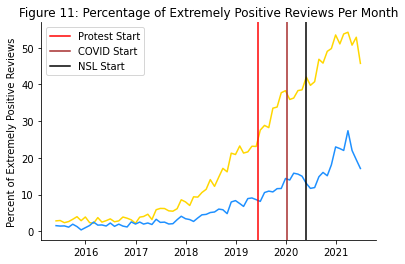

In [42]:
fig, ax = plt.subplots()
ax.plot(monthjoin["extreme_high_y_percent"].iloc[-75:-1], color="gold")
ax.plot(monthjoin["extreme_high_b_percent"].iloc[-75:-1], color="dodgerblue")
ax.axvline(datetime(2019, 6, 12), color="red", label="Protest Start")
ax.axvline(datetime(2020, 1, 12), color="brown", label="COVID Start")
ax.set_title("Figure 11: Percentage of Extremely Positive Reviews Per Month")
ax.set_ylabel("Percent of Extremely Positive Reviews")
ax.axvline(datetime(2020, 6, 1), color="black", label="NSL Start")
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.legend()
fig.savefig("Pos_extreme_reviews.png", bbox_inches="tight");

In [223]:
monthjoin["full_blue"]

date
1999-11-30       9
1999-12-31      13
2000-01-31      41
2000-02-29      10
2000-03-31      13
              ... 
2021-03-31     938
2021-04-30    1199
2021-05-31    1242
2021-06-30     930
2021-07-31       5
Freq: M, Name: full_blue, Length: 261, dtype: int64

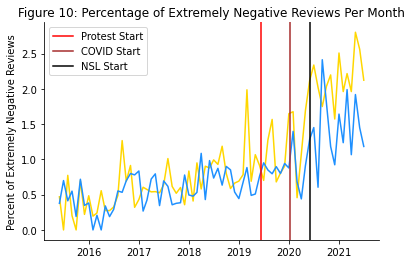

In [43]:
fig, ax = plt.subplots()
ax.plot(monthjoin[[
           "extreme_low_y_percent", 
]].iloc[-75:], color="gold")
ax.plot(monthjoin[[
           "extreme_low_b_percent", 
]].iloc[-75:], color="dodgerblue")
ax.axvline(datetime(2019, 6, 12), color="red", label="Protest Start")
ax.axvline(datetime(2020, 1, 12), color="brown", label="COVID Start")
ax.axvline(datetime(2020, 6, 1), color="black", label="NSL Start")
ax.legend()
ax.set_title("Figure 10: Percentage of Extremely Negative Reviews Per Month")
ax.set_ylabel("Percent of Extremely Negative Reviews")
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
fig.savefig("Neg_extreme_reviews.png", bbox_inches="tight");
# ax.text(datetime(2020, 6, 30), .027,'NSL', rotation=90)
# ax.show()

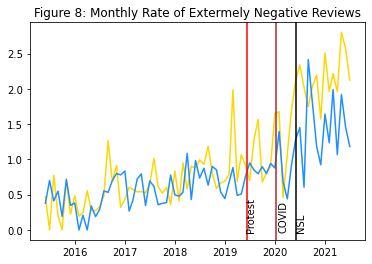

In [225]:
plt.plot(monthjoin[[
           "extreme_low_y_percent", 
]].iloc[-75:], color="gold")

plt.plot(monthjoin[[
           "extreme_low_b_percent", 
]].iloc[-75:], color="dodgerblue")

# , ""
# TODO: FIGURE
plt.axvline(datetime(2019, 6, 12), color="red")
plt.text(datetime(2019, 6, 1), -0.008,'Protest',rotation=90)
plt.axvline(datetime(2020, 1, 12), color="brown")
plt.text(datetime(2020, 1, 25), -0.008,'COVID',rotation=90)

# plt.text(datetime(2019, 6, 12),0,'balh"',rotation=90)

plt.axvline(datetime(2020, 6, 1), color="black")
plt.text(datetime(2020, 6, 1), -.006,'NSL', rotation=90)
plt.title("Figure 8: Monthly Rate of Extermely Negative Reviews")
plt.show()

In [70]:
yellow_extreme.url / yellowmonths.url

date
2005-03-31         NaN
2005-04-30         NaN
2005-05-31         NaN
2005-06-30         NaN
2005-07-31         NaN
                ...   
2021-02-28    0.007767
2021-03-31    0.009259
2021-04-30    0.012853
2021-05-31    0.012931
2021-06-30    0.007353
Freq: M, Name: url, Length: 196, dtype: float64

Text(0.5, 1.0, 'blue')

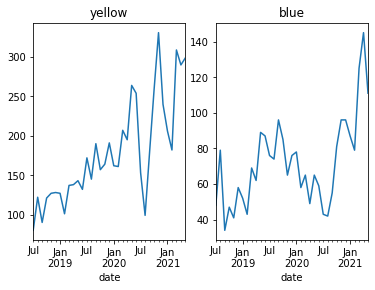

In [57]:
plt.subplot(1, 2,1)
yellow_extreme = groupbymonth(yellowdf[yellowdf[ratingcols].eq(5).all(1) | yellowdf[ratingcols].eq(1).all(1)])
yellow_extreme.url.iloc[-36:-1].plot(kind="line")
plt.title("yellow")
plt.subplot(1, 2,2)
blue_extreme = groupbymonth(bluedf[bluedf[ratingcols].eq(5).all(1) | bluedf[ratingcols].eq(1).all(1)])
blue_extreme.url.iloc[-36:-1].plot(kind="line")
plt.title("blue")


In [53]:
bluedf.groupby(month)

,url,id,total_reviews,final_url,a_plus,username,grade,user_link,title,review_link,...,type_of_meal,taste,decor,service,hygiene,value,aggregate_rating,during_protest,during_covid,pre_covid
0,https://www.openrice.com/en/hongkong/r-lee-hin...,764,3,https://www.openrice.com/en/hongkong/r-lee-hin...,0,我識米老鼠,Level1,/en/restaurant/userinfo.htm?userid=65454328,\r\n,/en/hongkong/review/%E4%B8%8B%E5%8D%88%E8%8C%B...,...,NaN,3.0,4.0,4.0,2.0,4.0,17.0,False,False,True
1,https://www.openrice.com/en/hongkong/r-lee-hin...,764,164,https://www.openrice.com/en/hongkong/r-lee-hin...,0,thatGreat,Level4,/en/restaurant/userinfo.htm?userid=458004,\r\n,/en/hongkong/review/%E4%B8%80%E8%88%AC-e3020124,...,NaN,NaN,2.0,2.0,2.0,NaN,NaN,False,False,True
2,https://www.openrice.com/en/hongkong/r-hoixe-c...,757,5,https://www.openrice.com/en/hongkong/r-hoixe-c...,0,和你食,Level2,/en/restaurant/userinfo.htm?userid=66375865,\r\n,/en/hongkong/review/%E6%8A%B5%E9%A3%9F%E5%A4%B...,...,NaN,5.0,4.0,4.0,4.0,5.0,22.0,True,False,False
3,https://www.openrice.com/en/hongkong/r-hoixe-c...,757,2.9K,https://www.openrice.com/en/hongkong/r-hoixe-c...,201,<IVY>,Level8,/en/restaurant/userinfo.htm?userid=302740,\r\n,/en/hongkong/review/%E4%B8%8A%E7%92%B0%E6%B7%B...,...,NaN,3.0,5.0,5.0,5.0,4.0,22.0,False,False,True
4,https://www.openrice.com/en/hongkong/r-lee-hin...,763,104,https://www.openrice.com/en/hongkong/r-lee-hin...,0,beebee98,Level4,/en/restaurant/userinfo.htm?userid=65847991,\r\n,/en/hongkong/review/%E7%B2%BE%E9%81%B8%E5%8D%8...,...,NaN,4.0,4.0,4.0,4.0,4.0,20.0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113497,https://www.openrice.com/en/hongkong/r-lung-wa...,2247,7.5K,https://www.openrice.com/en/hongkong/r-lung-wa...,183,Gourmet KC,Level4,/en/restaurant/userinfo.htm?userid=10604,\r\n,/en/hongkong/review/%E5%B9%BE%E5%90%8A%E8%85%B...,...,NaN,3.0,4.0,4.0,4.0,2.0,17.0,False,False,True
113498,https://www.openrice.com/en/hongkong/r-lung-wa...,2247,98,https://www.openrice.com/en/hongkong/r-lung-wa...,0,ALIBI,Level3,/en/restaurant/userinfo.htm?userid=12050,\r\n,/en/hongkong/review/%E5%9C%A8%E5%8B%95%E7%89%A...,...,NaN,5.0,4.0,5.0,4.0,3.0,21.0,False,False,True
113499,https://www.openrice.com/en/hongkong/r-lung-wa...,2247,0,https://www.openrice.com/en/hongkong/r-lung-wa...,0,嘩啦嘩啦,(Non-member),NaN,\r\n,/en/hongkong/review/%E9%BE%8D%E8%8F%AF%E4%B9%B...,...,NaN,4.0,3.0,4.0,3.0,3.0,17.0,False,False,True
113500,https://www.openrice.com/en/hongkong/r-lung-wa...,2247,349,https://www.openrice.com/en/hongkong/r-lung-wa...,0,JESSIE,Level4,/en/restaurant/userinfo.htm?userid=4135,\r\n,/en/hongkong/review/%E4%BE%9D%E7%84%B6%E5%87%A...,...,NaN,3.0,3.0,4.0,3.0,5.0,18.0,False,False,True


In [41]:
bluedf.groupby(pd.Grouper(key='date', freq='1M'))["mean_rating"].mean()

date
1999-10-31    4.200000
1999-11-30    4.150000
1999-12-31    3.371429
2000-01-31    2.942857
2000-02-29    3.533333
                ...   
2021-03-31    4.065358
2021-04-30    4.001696
2021-05-31    3.993139
2021-06-30    3.972143
2021-07-31    3.460000
Freq: M, Name: mean_rating, Length: 262, dtype: float64

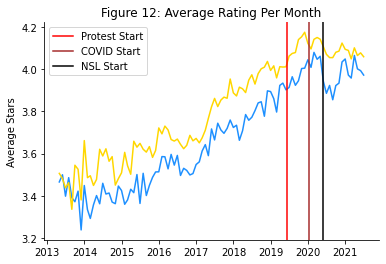

In [44]:
fig, ax = plt.subplots()
ax.plot(bluedf.groupby(pd.Grouper(key='date', freq='1M'))["mean_rating"].mean().iloc[-100:-1], c="dodgerblue")
ax.plot(yellowdf.groupby(pd.Grouper(key='date', freq='1M'))["mean_rating"].mean().iloc[-100:-1], c="gold")
ax.axvline(datetime(2019, 6, 12), color="red", label="Protest Start")
ax.axvline(datetime(2020, 1, 12), color="brown", label="COVID Start")
ax.set_title("Figure 12: Average Rating Per Month")
ax.set_ylabel("Average Stars")
ax.axvline(datetime(2020, 6, 1), color="black", label="NSL Start")
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.legend()
fig.savefig("avrate.png", bbox_inches="tight");


In [244]:
bluedf.columns

Index(['url', 'id', 'total_reviews', 'final_url', 'a_plus', 'username',
       'grade', 'user_link', 'review_link', 'title', 'emoji', 'date',
       'viewcount', 'body', 'dining_method', 'date_of_visit',
       'spending_per_head', 'recommended_dishes', 'waiting_time',
       'type_of_meal', 'taste', 'decor', 'service', 'hygiene', 'value',
       'color', 'aggregate_rating', 'mean_rating', 'during_protest',
       'during_covid', 'pre_covid'],
      dtype='object')

No handles with labels found to put in legend.


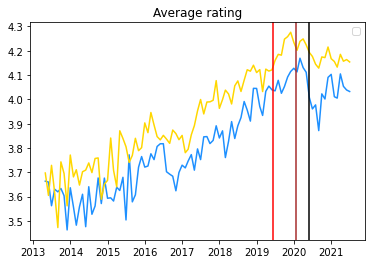

In [248]:
fig, ax = plt.subplots()
ax.plot(bluedf.groupby(pd.Grouper(key='date', freq='1M'))["taste"].mean().iloc[-100:-1], c="dodgerblue")
ax.plot(yellowdf.groupby(pd.Grouper(key='date', freq='1M'))["taste"].mean().iloc[-100:-1], c="gold")

ax.axvline(datetime(2019, 6, 12), color="red")
# plt.text(datetime(2019, 6, 12),3,'Protest',rotation=90)
ax.axvline(datetime(2020, 1, 25), color="brown")
# plt.text(datetime(2020, 1, 25),3,'COVID',rotation=90)

# plt.text(datetime(2019, 6, 12),0,'balh"',rotation=90)

ax.axvline(datetime(2020, 6, 1), color="black")
# plt.text(datetime(2020, 6, 1), 3,'NSL', rotation=90)
ax.set_title("Average rating")
ax.legend()
# ax.show()


# ax.plot(monthjoin["extreme_high_y_percent"].iloc[-75:-1], color="gold")
# ax.plot(monthjoin["extreme_high_b_percent"].iloc[-75:-1], color="dodgerblue")
# ax.axvline(datetime(2019, 6, 12), color="red", label="Protest Start")
# ax.axvline(datetime(2020, 1, 12), color="brown", label="COVID Start")
# ax.set_title("Figure 9: Percentage of Extremely Positive Reviews Per Month")
# ax.set_ylabel("Percent of Extremely Positive Reviews")
# ax.axvline(datetime(2020, 6, 1), color="black", label="NSL Start")
# ax.spines['top'].set_color('none')
# ax.spines['right'].set_color('none')
# ax.legend()
# fig.savefig("Pos_extreme_reviews.png", bbox_inches="tight");

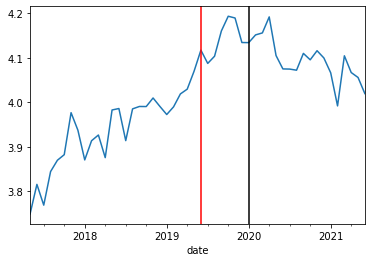

In [75]:
plt.axvline(datetime(2019, 6, 12), color="red")
plt.axvline(datetime(2020, 1, 25), color="black")

In [102]:
bluedf[bluedf.date_of_visit.notna()]

,url,id,total_reviews,final_url,a_plus,username,grade,user_link,title,review_link,...,taste,decor,service,hygiene,value,aggregate_rating,mean_rating,during_protest,during_covid,pre_covid


In [104]:
yellowdf.date_of_visit.notna()

0        False
1        False
2        False
3        False
4        False
         ...  
67669    False
67670    False
67671    False
67672    False
67673    False
Name: date_of_visit, Length: 67674, dtype: bool

In [59]:
ydov = ydf[ydf.date_of_visit.notna()]

In [62]:
ydov.date_of_visit
# = 
# pd.to_datetime(ydov.date_of_visit)

6        2020-12-09
12       2020-12-16
15       2021-02-21
17       2021-02-24
20       2021-01-15
            ...    
48478    2016-12-19
48479    2016-12-09
48480    2016-12-01
48484    2016-11-21
48485    2016-11-22
Name: date_of_visit, Length: 86968, dtype: object